In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
# List of encodings to try
encodings = ['utf-8', 'iso-8859-1', 'windows-1252']

# Attempt to read the file with each encoding
for encoding in encodings:
    try:
        df = pd.read_csv("spam.csv", encoding=encoding)
        print("File read successfully with encoding:", encoding)
        # If successful, break out of the loop
        break
    except UnicodeDecodeError:
        print("Error reading file with encoding:", encoding)

Error reading file with encoding: utf-8
File read successfully with encoding: iso-8859-1


In [59]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [60]:
df.shape

(5572, 5)

# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation


1. Data Cleaning

In [64]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [70]:
df.sample(5)

,target,text
4092,ham,"\Life is nothing wen v get everything\"". But \..."
3695,ham,I am in tirupur. call you da.
2069,spam,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 ..."
3471,ham,I think IÛ÷m waiting for the same bus! Inform...
1715,ham,Asking do u knw them or nt? May be ur frnds or...


In [71]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [73]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [74]:
df.sample(5)

,target,text
1812,ham,\Getting tickets 4 walsall tue 6 th march. My ...
3998,ham,K...k...when will you give treat?
2605,ham,\HELLO U.CALL WEN U FINISH WRK.I FANCY MEETIN ...
4949,ham,Hi its me you are probably having too much fun...
4772,ham,Ok then u tell me wat time u coming later lor.


In [75]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [76]:
df['target'] = encoder.fit_transform(df['target'])

In [77]:
df['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int32

In [81]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [82]:
# check for duplicate values
df.duplicated().sum()

403

In [83]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [84]:
df.duplicated().sum()


0

In [85]:
df.shape

(5169, 2)


2.EDA

In [29]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [87]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

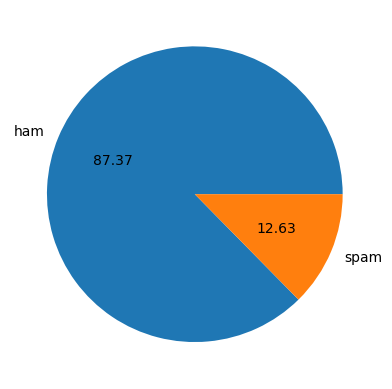

In [31]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

Data is imbalanced

In [88]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [89]:
df['num_characters'] = df['text'].apply(len)

C:\Users\bhara\AppData\Local\Temp\ipykernel_11220\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [90]:
df['num_characters']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 5169, dtype: int64

In [91]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [92]:
# count the length of list
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\bhara\AppData\Local\Temp\ipykernel_11220\1283174753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [93]:
df['num_words']

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: num_words, Length: 5169, dtype: int64

In [94]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [100]:
# sentence tokenization
df['num_sentances'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\bhara\AppData\Local\Temp\ipykernel_11220\1728222151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentances'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [101]:
df['num_sentances']

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: num_sentances, Length: 5169, dtype: int64

In [102]:
df.head()

,target,text,num_characters,num_words,num_sentences,num_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,2
1,0,Ok lar... Joking wif u oni...,29,8,2,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,2
3,0,U dun say so early hor... U c already then say...,49,13,1,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,1


In [103]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [104]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [105]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [41]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

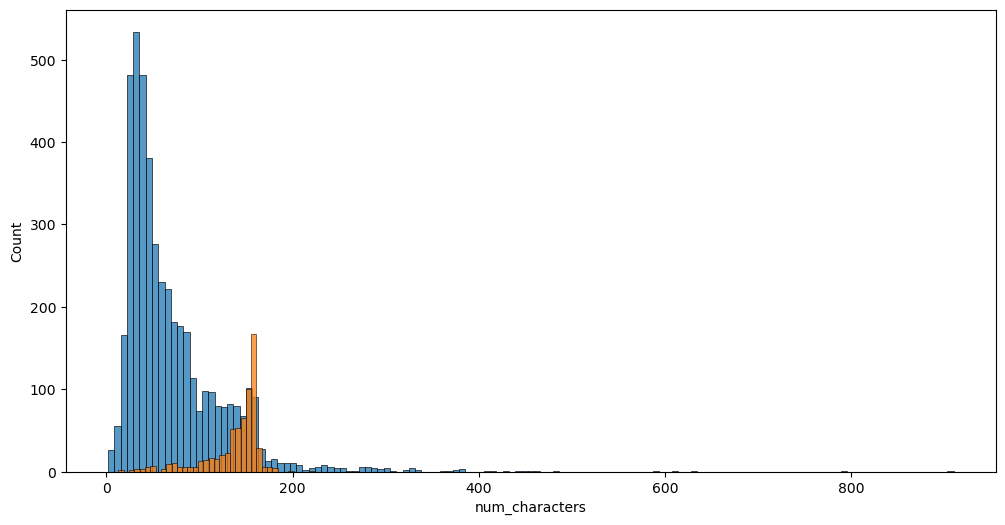

In [106]:
plt.figure(figsize=(12,6))

sns.histplot(df[df['target']==0]['num_characters']) # for ham
sns.histplot(df[df['target']==1]['num_characters'])   #for spam

<Axes: xlabel='num_words', ylabel='Count'>

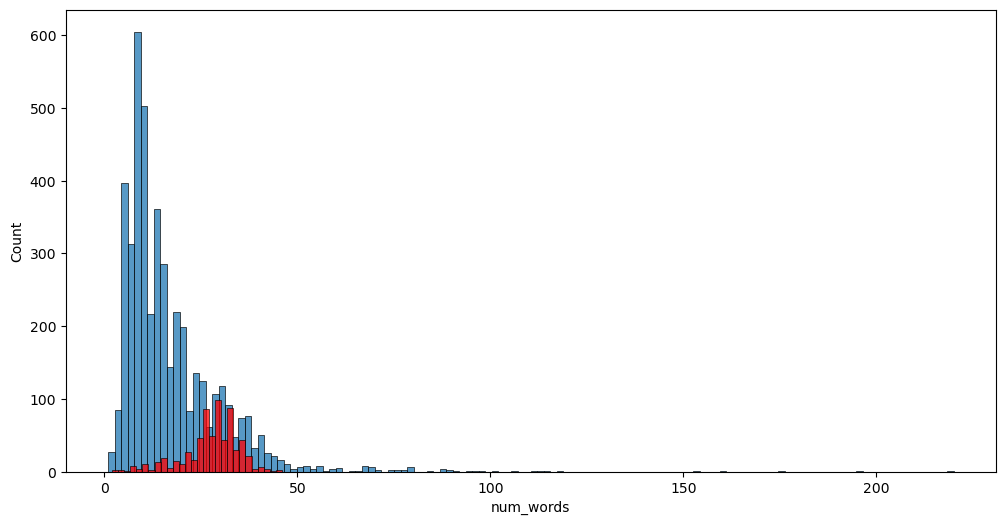

In [107]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words']) # for ham
sns.histplot(df[df['target']==1]['num_words'],color='red')   #for spam


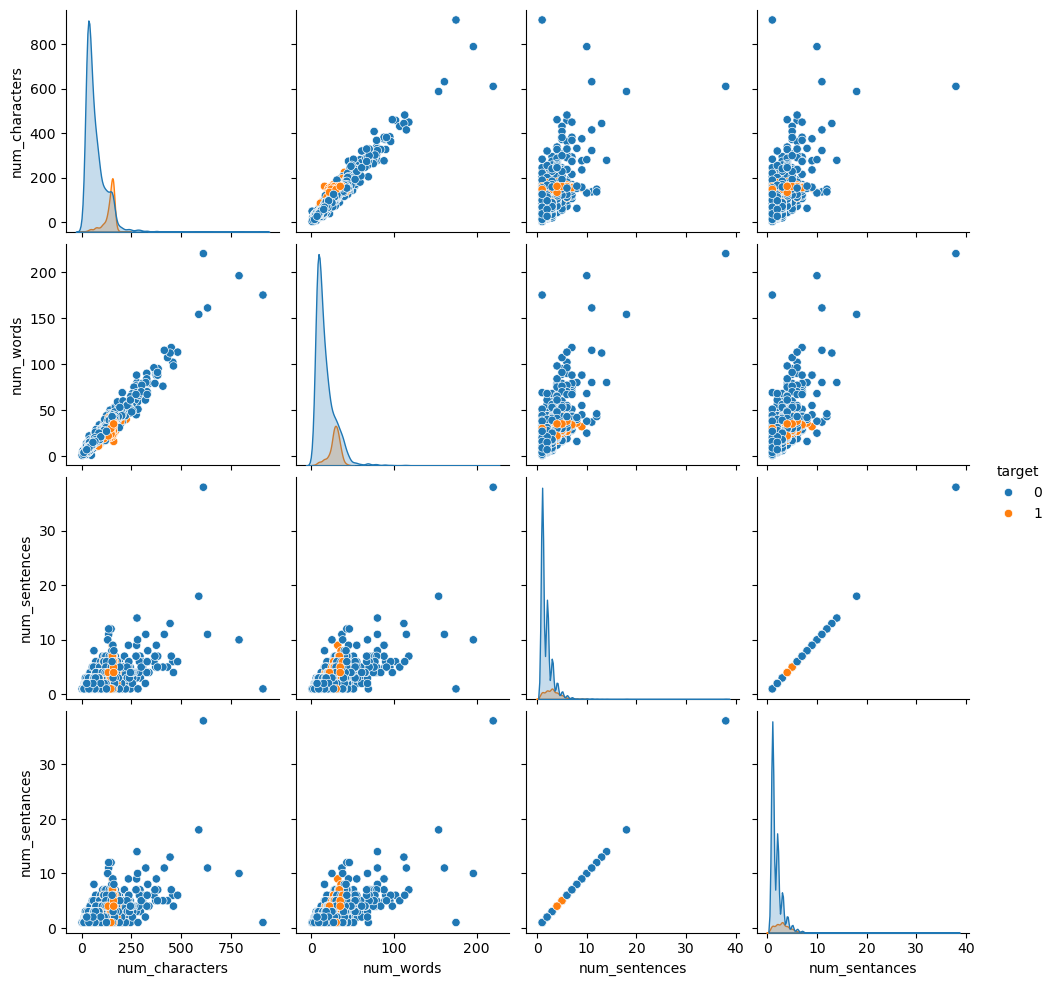

In [108]:
sns.pairplot(df,hue='target')

In [109]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

3. Data Preprocessing:

Lower case

Tokenization

Removing special characters

Removing stop words and punctuation

Stemming

In [110]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [111]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [112]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [113]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)


In [114]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [115]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [116]:
ps.stem('loving')

'love'

In [117]:
df['transformed_text'] = df['text'].apply(transform_text)

In [118]:
df.head()

,target,text,num_characters,num_words,num_sentences,num_sentances,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,1,nah think goe usf live around though


In [122]:
!pip install wordcloud


   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 217.9 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/301.4 kB 435.7 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.4 kB 525.1 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.4 kB 525.1 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.4 kB 525.1 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.4 kB 525.1 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.4 kB 525.1 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.4 kB 525.1 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.4 kB 525.1 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.4 kB 525.1 kB

In [123]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [124]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

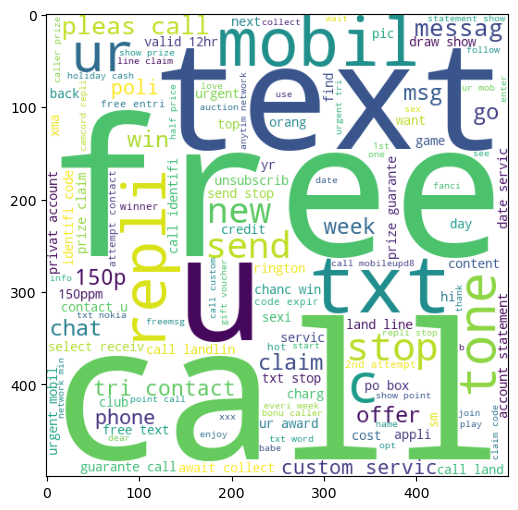

In [125]:

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)


In [126]:
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

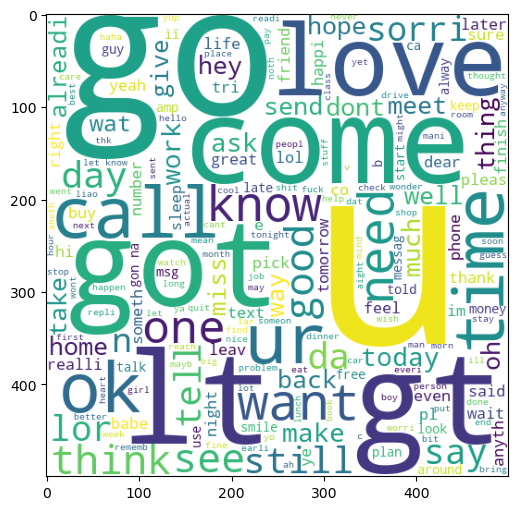

In [127]:
plt.figure(figsize=(15,6))    #for ham message
plt.imshow(spam_wc)

In [128]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [129]:

len(spam_corpus)

9939

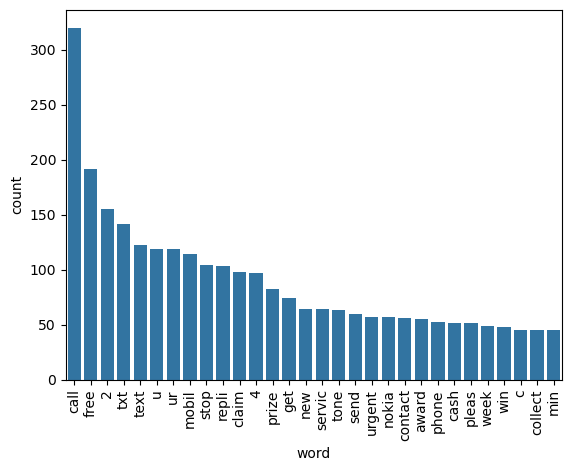

In [130]:
from collections import Counter
# message me sabse jada use kiye jane wale words ka graph


# Assuming 'spam_corpus' is a list of words
word_counts = Counter(spam_corpus).most_common(30)
df_word_counts = pd.DataFrame(word_counts, columns=['word', 'count'])

# Plotting
sns.barplot(x='word', y='count', data=df_word_counts)
plt.xticks(rotation='vertical')
plt.show()

In [131]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [132]:
len(ham_corpus)

35404

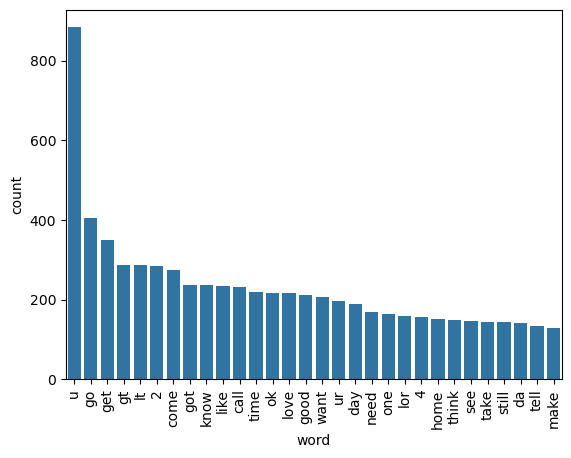

In [133]:
# Counting the 30 most common words in the ham_corpus
word_counts = Counter(ham_corpus).most_common(30)

# Converting the counts to a DataFrame
df_word_counts = pd.DataFrame(word_counts, columns=['word', 'count'])

# Plotting the data using seaborn's barplot
sns.barplot(x='word', y='count', data=df_word_counts)

# Rotating the x-axis labels for better readability
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

# Model building

In [134]:

# model building

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [135]:

X = tfidf.fit_transform(df['transformed_text']).toarray()

In [136]:
X.shape

(5169, 3000)

In [137]:
y = df['target'].values

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=2)

In [140]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [141]:

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [142]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [143]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [144]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [146]:

lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)

In [147]:
clfs = {
    'SVC' : svc,
    'LR': lrc,
}

In [148]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [149]:

train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [150]:
# Support Vector
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [151]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [152]:
y_pred = svm_model.predict(X_test)

In [153]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 97.87%


In [154]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.98      0.86      0.92       138

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034

